
# Importamos todas las Librerías necesarias


In [ ]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image

# Conexion con Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Cargamos el set de Imágenes

In [ ]:
#Cargando las carpetas a un arreglo

labels = 3

path1='./gdrive/MyDrive/imagenes/nitidas'
path2='./gdrive/MyDrive/imagenes/movimiento'
path3='./gdrive/MyDrive/imagenes/gaussianas'

path_list=[path1, path2, path3]
label_list=[0,1,2,3]

In [ ]:
print('Resumen')
for i in range(0,labels):
 print('--carpeta',i,'--total:',len(os.listdir(path_list[i])), ' --- label/ID: ', label_list[i],)

Resumen
--carpeta 0 --total: 1000  --- label/ID:  0
--carpeta 1 --total: 1000  --- label/ID:  1
--carpeta 2 --total: 1000  --- label/ID:  2


# Pasando las imagenes a un arreglo

In [ ]:
# Definimos la funcion
# Recibe (Lista de carpeta de imagenes, Lista de etiquetas, maximo de imagenes)
def image_to_array(folder_path, result, image_max):
   #x para las imagenes e y para las etiquetas 
    X = []; y = []

    for index, file_name in enumerate(os.listdir(folder_path)[:image_max]):
         if file_name != '.DS_Store':
            #nombre de la ruta de la imagen 
            image_path = folder_path + '/' + file_name
            #guardar imagenes en el arreglo 
            img = keras.utils.load_img(image_path,target_size=None)
            X.append(np.asarray(img))
            y.append(result) 

            if index < 3:
                print('Ajuste de la imagen -', img.size, '| Archivo: -', file_name)
            else:
                if index % 100 == 0:
                    print(index, 'Imagenes cargadas hasta el momento')

    print('---\n', len(X), 'Imagenes en la carpeta\n')

    return X, y

In [ ]:
print('\nCargando datos ...')

#Declaracion de arreglos para cada tipo de imagen
X_1_nitidas = []
X_2_motion = []
X_3_gauss = []

#Declaracion de arreglos para etiquetas
y_1 = []
y_2 = []
y_3 = []

#Declaracion de lista de arreglos (revisar)
X_list = [X_1_nitidas, X_2_motion, X_3_gauss]
#Declaracion de lista de etiquetas
y_list = [y_1, y_2, y_3]


#Declaramos X & y para guardar las imagenes y sus etiquetas respectivamente
X, y = image_to_array(path_list[0], label_list[0], 1000)


for i in range(1, labels):
    print('Stage:', i,'/', labels-1,'\n---')
    X_list[i], y_list[i] = image_to_array(path_list[i], label_list[i], 1000)
    X = np.concatenate((X, X_list[i]),axis=0)  
    y = np.concatenate((y, y_list[i]),axis=0) 

print('\nCarga de datos realizada!')


Cargando datos ...
Ajuste de la imagen - (256, 256) | Archivo: - pexels-chavdar-lungov-3996362256px.jpg
Ajuste de la imagen - (256, 256) | Archivo: - dog.4019.jpg
Ajuste de la imagen - (256, 256) | Archivo: - apparel (289) (Copy).jpg
100 Imagenes cargadas hasta el momento
200 Imagenes cargadas hasta el momento
300 Imagenes cargadas hasta el momento
400 Imagenes cargadas hasta el momento
500 Imagenes cargadas hasta el momento
600 Imagenes cargadas hasta el momento
700 Imagenes cargadas hasta el momento
800 Imagenes cargadas hasta el momento
900 Imagenes cargadas hasta el momento
---
 1000 Imagenes en la carpeta

Stage: 1 / 2 
---
Ajuste de la imagen - (256, 256) | Archivo: - ferris-wheel-g77e9fa609_640.jpg
Ajuste de la imagen - (256, 256) | Archivo: - clay-banks-X_ZHRgavKHg-unsplash.jpg
Ajuste de la imagen - (256, 256) | Archivo: - catgirlmutant-9zy1H2xcYHE-unsplash.jpg
100 Imagenes cargadas hasta el momento
200 Imagenes cargadas hasta el momento
300 Imagenes cargadas hasta el momento


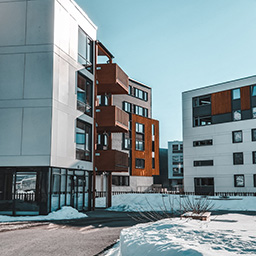

In [ ]:
#Esta funcion recibe (la carptea de imagenes, el indice)
def check_image_from_folder(folder_path, image_index):
    '''
    input: folder path & index of the image within the folder
    output: show the image
    '''
    file_name = str(os.listdir(folder_path)[image_index])
    image_path = folder_path + '/' + file_name
    img = keras.utils.load_img(image_path,target_size=None)
    return img

img_index = 999
check_image_from_folder(path1, img_index)

# Normalizacion

In [ ]:
#Pasar valor de pixeles de 0-255 a 0-1 para que la red aprenda mejor y mas rapido
X = np.stack(X)
X = X.astype('float32')
X = X/255

y = to_categorical(y)

np.array(X).shape
np.array(y).shape

(3000, 3)

In [ ]:
#np.save('X_3-labels_nitidas-1000_motion-1000_gauss-1000.npy', X)
#np.save('y_3-labels__nitidas-1000_motion-1000_gauss-1000.npy', y)

# Cargando Datos

In [ ]:
#X = np.load('X_3-labels_nitidas-1000_motion-1000_gauss-1000.npy')
#y = np.load('y_3-labels__nitidas-1000_motion-1000_gauss-1000.npy')

X.shape
y.shape

(3000, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.7*len(X)), random_state=42)

In [ ]:
print('Cantidad imagenes entrenamiento : ', X_train.shape, y_train.shape)
print('Cantidad imagenes test : ', X_test.shape, y_test.shape)

Cantidad imagenes entrenamiento :  (2100, 256, 256, 3) (2100, 3)
Cantidad imagenes test :  (900, 256, 256, 3) (900, 3)


Text(0.5, 1.0, 'Imagen ejemplo - Categoría: 1')

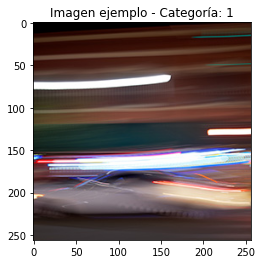

In [ ]:

nimagen = 7
plt.imshow(X_train[nimagen,:])
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))

# MODELO CNN

In [ ]:
model = Sequential()

#capa 1
model.add(Conv2D(256, (5,5), activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.5))

#capa 2
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.45))

#capa 3
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.40))


#capa 4
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#capa fully-connected
model.add(Flatten())
model.add(Dropout(0.4))
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))




#ann clasificador con softmax
model.add(Dense(3, activation='softmax'))


#resumen de la arquitectura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 84, 84, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 128)       0

In [ ]:
#compilacion del modelo

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
nbatch_size=20
nepochs=40

#entrenamiento
model.fit(X_train, y_train,epochs=nepochs, batch_size=nbatch_size,verbose=1,  validation_data=(X_test, y_test))


Epoch 1/40
105/105 [==============================] - 37s 260ms/step - loss: 1.1119 - accuracy: 0.3438 - val_loss: 1.0987 - val_accuracy: 0.3233
Epoch 2/40
105/105 [==============================] - 25s 239ms/step - loss: 1.0972 - accuracy: 0.3571 - val_loss: 1.1002 - val_accuracy: 0.3233
Epoch 3/40
105/105 [==============================] - 25s 235ms/step - loss: 1.0847 - accuracy: 0.4067 - val_loss: 1.1028 - val_accuracy: 0.3322
Epoch 4/40
105/105 [==============================] - 24s 229ms/step - loss: 1.0934 - accuracy: 0.3733 - val_loss: 1.0778 - val_accuracy: 0.3989
Epoch 5/40
105/105 [==============================] - 24s 225ms/step - loss: 1.0730 - accuracy: 0.3943 - val_loss: 1.0895 - val_accuracy: 0.3789
Epoch 6/40
105/105 [==============================] - 24s 225ms/step - loss: 1.0836 - accuracy: 0.3795 - val_loss: 1.0934 - val_accuracy: 0.3511
Epoch 7/40
105/105 [==============================] - 24s 226ms/step - loss: 1.0726 - accuracy: 0.4005 - val_loss: 1.0871 - val_ac

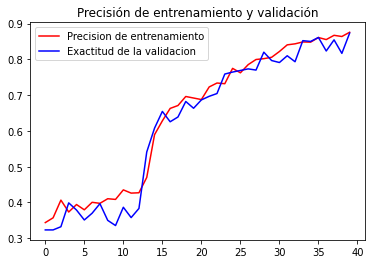

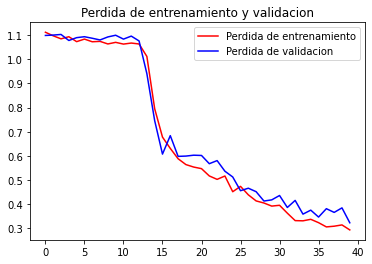

In [ ]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Precision de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Perdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento y validacion')
plt.legend()
plt.show()

In [ ]:
model.save('modelo.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras modelo.h5 carpeta_salida

#Metricas

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('accuracy: ',score[1])
print('loss: ',score[0])

29/29 [==============================] - 4s 70ms/step - loss: 0.3235 - accuracy: 0.8733
accuracy:  0.8733333349227905
loss:  0.32346323132514954


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

29/29 [==============================] - 2s 54ms/step


In [ ]:
y_pred_train

array([[8.2806897e-01, 1.7183566e-01, 9.5390533e-05],
       [7.6696306e-01, 2.3286264e-01, 1.7425598e-04],
       [4.9443011e-06, 2.0613802e-04, 9.9978894e-01],
       ...,
       [1.4016874e-01, 8.5507727e-01, 4.7540362e-03],
       [2.6265559e-01, 7.3702878e-01, 3.1557051e-04],
       [6.9170797e-01, 3.0679622e-01, 1.4958241e-03]], dtype=float32)

In [ ]:
y_pred_test

array([[3.1225228e-01, 6.8608195e-01, 1.6657630e-03],
       [7.4491310e-01, 2.5432107e-01, 7.6579326e-04],
       [9.2757858e-02, 9.0704471e-01, 1.9742700e-04],
       ...,
       [2.6061628e-02, 9.7390908e-01, 2.9222312e-05],
       [7.4019814e-01, 2.5651920e-01, 3.2826769e-03],
       [5.6941873e-01, 4.2626566e-01, 4.3156338e-03]], dtype=float32)

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
for i in range(len(y_pred_test)):
  index = list(y_pred_test[i]).index(max(y_pred_test[i])) # agarra el valor maximo
  for j in range(len(y_pred_test[i])):
    y_pred_test[i][j] = 0
  y_pred_test[i][index]=1 # de los valores maximos le pone como 1

  for i in range(len(y_pred_train)):
     index = list(y_pred_train[i]).index(max(y_pred_train[i]))
     for j in range(len(y_pred_train[i])):
       y_pred_train[i][j] = 0
     y_pred_train[i][index]=1

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       687
           1       0.91      0.82      0.86       709
           2       0.96      1.00      0.98       704

   micro avg       0.91      0.91      0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100
 samples avg       0.91      0.91      0.91      2100



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       313
           1       0.85      0.74      0.79       291
           2       0.95      1.00      0.97       296

   micro avg       0.87      0.87      0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900
 samples avg       0.87      0.87      0.87       900



In [ ]:
y_true = y_test.argmax(axis=1)

In [ ]:
y_true

array([1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2,
       0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2,
       1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0,

In [ ]:
y_pred = y_pred_test.argmax(axis=1)

In [ ]:
y_pred

array([1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0,
       2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2,
       1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0,

#Matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

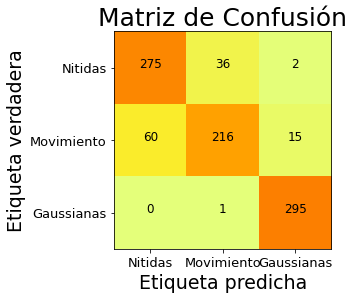

In [ ]:
plt.clf()
cm = confusion_matrix(y_true, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Nitidas', 'Movimiento', 'Gaussianas']
plt.title('Matriz de Confusión',fontsize=25)
plt.ylabel('Etiqueta verdadera',fontsize=19)
plt.xlabel('Etiqueta predicha',fontsize=19)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
tick_marks = np.arange(len(classNames))
plt.yticks(rotation=0)
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
for i in range(3):
    for j in range(3):
        plt.text(j,i,str(cm[i][j]),fontsize=12,horizontalalignment="center")
plt.show()

#Prediccion con imagenes nuevas

In [ ]:
def predict_folder_image(model, folder_path, im):  
    print('Folder: ',folder_path.split('/')[-1])
    
    test_pic= []
    
    file_name = os.listdir(folder_path)[im]
    
    if file_name != '.DS_Store':
        image_path = folder_path + '/' + file_name
        img = keras.utils.load_img(image_path, target_size=None)#redimensiona imagen de entrada.
        test_pic.append(np.asarray(img))
        test_pic = np.stack(test_pic)/255.#normaliza

        result = model.predict(test_pic)#[0]
        print(result)
        print("La clase a la que corresponde es: " + str(np.argmax(result)))#clasifica la clase con su mayor valor
        if np.argmax(result) == 0:
           print("La clase predicha es: NITIDA")
        elif np.argmax(result) == 1:
          print("La clase predicha es: MOVIMIENTO")
        else: 
          print("La clase predicha es: GAUSSIANA")
        
    else:
        img = 'This is DS_Store file'
    
    return img

In [ ]:
prediccion_path = './gdrive/MyDrive/prueba'

Folder:  prueba
1/1 [==============================] - 0s 37ms/step
[[2.6855156e-01 7.3077935e-01 6.6916109e-04]]
La clase a la que corresponde es: 1
La clase predicha es: MOVIMIENTO


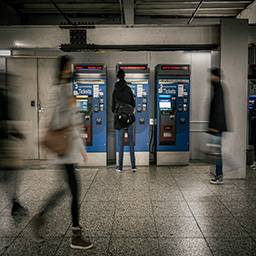

In [ ]:
  check_image_from_folder(prediccion_path,0)
  predict_folder_image(model,prediccion_path, 0)

Folder:  prueba
1/1 [==============================] - 0s 26ms/step
[[9.6323627e-01 3.6763724e-02 4.9024951e-08]]
La clase a la que corresponde es: 0
La clase predicha es: NITIDA


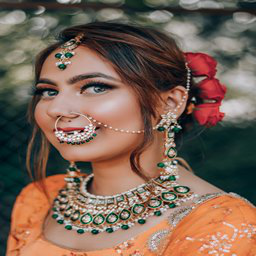

In [ ]:

  check_image_from_folder(prediccion_path,1)
  predict_folder_image(model,prediccion_path, 1)

Folder:  prueba
1/1 [==============================] - 0s 23ms/step
[[0.3458831  0.6489975  0.00511941]]
La clase a la que corresponde es: 1
La clase predicha es: MOVIMIENTO


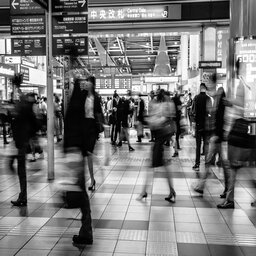

In [ ]:
  check_image_from_folder(prediccion_path,3)
  predict_folder_image(model,prediccion_path, 3)

Folder:  prueba
1/1 [==============================] - 0s 33ms/step
[[0.55080104 0.430178   0.01902096]]
La clase a la que corresponde es: 0
La clase predicha es: NITIDA


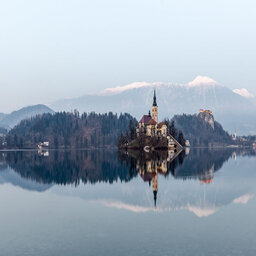

In [ ]:
check_image_from_folder(prediccion_path,4)
predict_folder_image(model,prediccion_path, 4)

Folder:  prueba
1/1 [==============================] - 0s 23ms/step
[[0.01845386 0.09070144 0.8908447 ]]
La clase a la que corresponde es: 2
La clase predicha es: GAUSSIANA


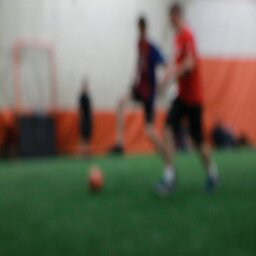

In [ ]:
  check_image_from_folder(prediccion_path,7)
  predict_folder_image(model,prediccion_path, 7)

Folder:  prueba
1/1 [==============================] - 0s 34ms/step
[[0.16302513 0.81528974 0.02168512]]
La clase a la que corresponde es: 1
La clase predicha es: MOVIMIENTO


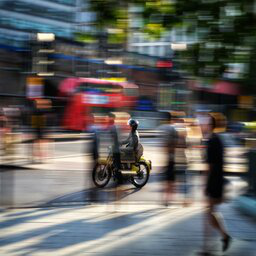

In [ ]:
check_image_from_folder(prediccion_path,8)
predict_folder_image(model,prediccion_path, 8)

Folder:  prueba
1/1 [==============================] - 0s 32ms/step
[[0.30225334 0.6969719  0.00077478]]
La clase a la que corresponde es: 1
La clase predicha es: MOVIMIENTO


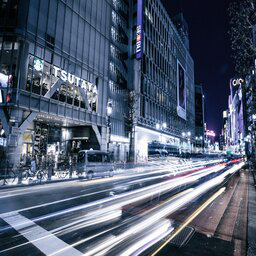

In [ ]:
check_image_from_folder(prediccion_path,9)
predict_folder_image(model,prediccion_path, 9)

Folder:  prueba
1/1 [==============================] - 0s 24ms/step
[[2.8446406e-01 7.1545917e-01 7.6779514e-05]]
La clase a la que corresponde es: 1
La clase predicha es: MOVIMIENTO


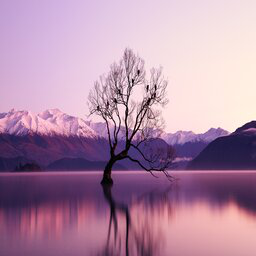

In [ ]:
check_image_from_folder(prediccion_path,11)
predict_folder_image(model,prediccion_path,11)

Folder:  prueba
1/1 [==============================] - 0s 21ms/step
[[0.5579166  0.4182462  0.02383726]]
La clase a la que corresponde es: 0
La clase predicha es: NITIDA


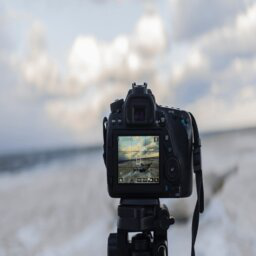

In [ ]:
check_image_from_folder(prediccion_path,13)
predict_folder_image(model,prediccion_path, 13)

Folder:  prueba
1/1 [==============================] - 0s 35ms/step
[[0.00157257 0.01269981 0.9857276 ]]
La clase a la que corresponde es: 2
La clase predicha es: GAUSSIANA


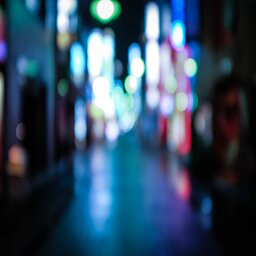

In [ ]:
check_image_from_folder(prediccion_path,15)
predict_folder_image(model,prediccion_path, 15)

Folder:  prueba
1/1 [==============================] - 0s 21ms/step
[[0.11151388 0.32284766 0.5656384 ]]
La clase a la que corresponde es: 2
La clase predicha es: GAUSSIANA


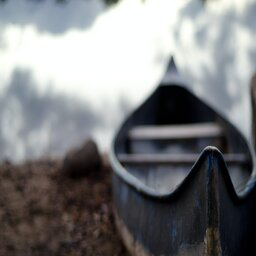

In [ ]:
check_image_from_folder(prediccion_path,16)
predict_folder_image(model,prediccion_path, 16)